In [121]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install pandas-gbq


In [2]:
pip install tensorflow


  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.20.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
from google.cloud import bigquery
import pandas_gbq
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import DistilBertTokenizer, DistilBertModel
import tensorflow as tf
from tensorflow.keras import layers, models
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
import string
import numpy as np


In [146]:
reviewgoogle = pandas_gbq.read_gbq("SELECT * FROM `prometheus-data-solutions.Datawarehouse_prometheus.google_nlp`")

Downloading: 100%|██████████|


In [147]:
reviewgoogle['comment'] = reviewgoogle['comment'].apply(lambda x: x.strip().replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').replace('\'', ' ').replace('\"', ' ').replace('\\', ' '))                 
# Define the regular expression pattern for special characters
special_char_pattern = '[^A-Za-z0-9\s.,!?]'

# Replace special characters in the 'comment' column with an empty string
reviewgoogle['comment'] = reviewgoogle['comment'].str.replace(special_char_pattern, '')
reviewgoogle['comment'] = reviewgoogle['comment'].apply(lambda x: re.sub(r'\s+', ' ', x))
reviewgoogle['comment'] = reviewgoogle['comment'].apply(lambda x: x.strip())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [148]:
reviewgoogle.head()

,id,name,date,comment,stars,source
0,0x89c6c7b9714bc937:0xd4dc2c15498fa,Karma Pizza,2019-10-07 06:35:18+00:00,Horrible the customer service is terrible the ...,1,google
1,0x89c6c7b9714bc937:0xd4dc2c15498fa,Karma Pizza,2017-01-02 23:54:27+00:00,Need to update website with new menu and price...,1,google
2,0x89c6c7b9714bc937:0xd4dc2c15498fa,Karma Pizza,2019-10-24 00:33:27+00:00,Pizza was nasty,1,google
3,0x406ff04796c5b853:0x1dca12f1604140,2 In One Breakfast & Lunch,2019-08-08 23:48:58+00:00,New owners. Horrible!! They have managed to me...,1,google
4,0x406ff04796c5b853:0x1dca12f1604140,2 In One Breakfast & Lunch,2019-04-06 11:27:34+00:00,Nasty food but the cashier very nice,1,google


In [ ]:
# Calculate the number of subsets (350 rows per subset)
num_subsets = len(reviewgoogle) // 350 + (1 if len(reviewgoogle) % 350 > 0 else 0)

# Create a list to store subsets
subsets = []

# Generate subsets
for i in range(num_subsets):
    start_idx = i * 350
    end_idx = (i + 1) * 350
    subset = reviewgoogle.iloc[start_idx:end_idx].copy()
    subsets.append(subset)

# Print the first few rows of each subset
for i, subset in enumerate(subsets):
    print(f"Subset {i + 1}:")
    print(subset.head())
    print("\n")

In [ ]:
# Assuming 'reviewgoogle' is your original DataFrame
# Assuming 'subsets' is the list of DataFrames created previously

# Load the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Function to perform sentiment analysis on a DataFrame
def perform_sentiment_analysis(subset):
    # Tokenize and perform sentiment analysis
    subset['sent_an'] = subset['comment'].apply(
        lambda x: tf.argmax(tf.nn.softmax(model(tokenizer.encode_plus(x, truncation=True, padding='max_length', max_length=128, return_tensors='tf')).logits, axis=1), axis=1).numpy()[0]
    )
    return subset

# Apply sentiment analysis to each subset
subsets_with_sentiment = [perform_sentiment_analysis(subset) for subset in subsets]

# Concatenate the subsets with sentiment analysis back into a single DataFrame
reviewgoogle_with_sentiment = pd.concat(subsets_with_sentiment, ignore_index=True)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [111]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Inicializamos
sid = SentimentIntensityAnalyzer()

# Ejecutamos el analisis en la columna review y creamos la columna sent_an con los resultados
reviewgoogle['sentiment_score'] = reviewgoogle['comment'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorizamos los scores
reviewgoogle['sent_an'] = reviewgoogle['sentiment_score'].apply(lambda x: 2 if x > 0.05 else (1 if -0.05 <= x <= 0.05 else 0))

# Eliminamos la columna auxiliar
#df_reviews.drop('sentiment_score', axis=1, inplace=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [149]:
from textblob import TextBlob

# Se crea una función para realizar análisis de sentimiento y clasificación utilizando TextBlob
def classify_sentiment(review):
    analysis = TextBlob(str(review))
    # El método sentiment.polarity devuelve un valor entre -1 y 1

    # Se establecen umbrales para clasificar en 1, 2, 3, 4, o 5.
    # Luego de algunas pruebas, se consideran apropiados los umbrales -0.2, 0, 0.2, y 0.4.
    if analysis.sentiment.polarity <= -0.2:
        return 1  # Muy Negativo
    elif -0.2 < analysis.sentiment.polarity <= 0:
        return 2  # Negativo
    elif 0 < analysis.sentiment.polarity <= 0.2:
        return 3  # Neutral
    elif 0.2 < analysis.sentiment.polarity <= 0.4:
        return 4  # Positivo
    else:
        return 5  # Muy Positivo

# Se aplica la función de análisis de sentimiento a la columna 'comment'
reviewgoogle['sentiment_analysis'] = reviewgoogle['comment'].apply(classify_sentiment)

# Se agrega la columna 'label' basada en los valores de 'sentiment_analysis'
reviewgoogle['label'] = reviewgoogle['sentiment_analysis'].apply(
    lambda x: 'NEGATIVO' if x in [1, 2] else ('NEUTRAL' if x == 3 else 'POSITIVO')
)

# Se agrega la columna 'sentiment_polarity' con los valores de 'analysis.sentiment.polarity'
reviewgoogle['sentiment_polarity'] = reviewgoogle['comment'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)


In [160]:
# A BIG QUERY
reviewgoogle.to_gbq(destination_table='Datawarehouse_prometheus.google_nlp_executed',project_id='prometheus-data-solutions', if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 12157.40it/s]


In [41]:
reviewyelp = pandas_gbq.read_gbq("SELECT * FROM `prometheus-data-solutions.Datawarehouse_prometheus.yelp_nlp`")


Downloading: 100%|██████████|


In [42]:
reviewyelp['comment'] = reviewyelp['comment'].apply(lambda x: x.strip().replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').replace('\'', ' ').replace('\"', ' ').replace('\\', ' '))                 
# Define the regular expression pattern for special characters
special_char_pattern = '[^A-Za-z0-9\s.,!?]'

# Replace special characters in the 'comment' column with an empty string
reviewyelp['comment'] = reviewyelp['comment'].str.replace(special_char_pattern, '')
reviewyelp['comment'] = reviewyelp['comment'].apply(lambda x: re.sub(r'\s+', ' ', x))
reviewyelp['comment'] = reviewyelp['comment'].apply(lambda x: x.strip())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [43]:
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    return text
reviewyelp['comment_normalized'] = reviewyelp['comment'].apply(normalize_text)

In [48]:
reviewyelp.head()

,id,name,date,stars,source,comment,sentiment_analysis,label,sentiment_polarity
0,--epgcb7xHGuJ-4PUeSLAw,Manhattan Bagel,2019-02-26 02:53:23+00:00,1,yelp,today at around 440 pm i decided i would commi...,2,NEGATIVO,-0.096250
1,--epgcb7xHGuJ-4PUeSLAw,Manhattan Bagel,2015-03-07 14:33:38+00:00,1,yelp,i was a regular costumer till today i ordered ...,2,NEGATIVO,-0.019444
2,--epgcb7xHGuJ-4PUeSLAw,Manhattan Bagel,2017-11-23 17:44:50+00:00,1,yelp,we came here today on nov 23 thanksgiving 2017...,3,NEUTRAL,0.035714
3,--epgcb7xHGuJ-4PUeSLAw,Manhattan Bagel,2019-11-05 19:51:31+00:00,1,yelp,what a grouch lady was very rude arrogant and ...,1,NEGATIVO,-0.545000
4,--epgcb7xHGuJ-4PUeSLAw,Manhattan Bagel,2013-11-18 19:15:29+00:00,1,yelp,worst bagels i ve ever had the place is dirty ...,1,NEGATIVO,-0.350000


In [45]:
reviewyelp = reviewyelp.drop(columns=['comment'])

reviewyelp = reviewyelp.rename(columns={'comment_normalized': 'comment'})
reviewyelp = reviewyelp.drop(columns=['comment_normalized'])
# Drop the 'comment' column


KeyError: "['comment_normalized'] not found in axis"

In [47]:
# Se crea una función para realizar análisis de sentimiento y clasificación utilizando TextBlob
def classify_sentiment(review):
    analysis = TextBlob(str(review))
    # El método sentiment.polarity devuelve un valor entre -1 y 1

    # Se establecen umbrales para clasificar en 1, 2, 3, 4, o 5.
    # Luego de algunas pruebas, se consideran apropiados los umbrales -0.2, 0, 0.2, y 0.4.
    if analysis.sentiment.polarity <= -0.2:
        return 1  # Muy Negativo
    elif -0.2 < analysis.sentiment.polarity <= 0:
        return 2  # Negativo
    elif 0 < analysis.sentiment.polarity <= 0.2:
        return 3  # Neutral
    elif 0.2 < analysis.sentiment.polarity <= 0.4:
        return 4  # Positivo
    else:
        return 5  # Muy Positivo

# Se aplica la función de análisis de sentimiento a la columna 'comment'
reviewyelp['sentiment_analysis'] = reviewyelp['comment'].apply(classify_sentiment)

# Se agrega la columna 'label' basada en los valores de 'sentiment_analysis'
reviewyelp['label'] = reviewyelp['sentiment_analysis'].apply(
    lambda x: 'NEGATIVO' if x in [1, 2] else ('NEUTRAL' if x == 3 else 'POSITIVO')
)

# Se agrega la columna 'sentiment_polarity' con los valores de 'analysis.sentiment.polarity'
reviewyelp['sentiment_polarity'] = reviewyelp['comment'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

In [49]:
# A BIG QUERY

reviewyelp.to_gbq(destination_table='Datawarehouse_prometheus.yelp_nlp_executed',project_id='prometheus-data-solutions', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 13315.25it/s]


In [52]:
reviewyelpnlp = pandas_gbq.read_gbq("SELECT * FROM `prometheus-data-solutions.Datawarehouse_prometheus.yelp_nlp_executed`")

Downloading: 100%|██████████|


In [18]:
reviewyelpnlp

,id,name,date,stars,source,comment,sentiment_analysis,label,sentiment_polarity
0,-HjH9XFJ8lS5Mq-uTsR4OQ,The Garden Table,2015-04-16 13:27:30+00:00,2,yelp,too expensive for what you get my field greens...,1,NEGATIVO,-0.216667
1,-V60XTbkUWtimOw5qTzozw,Domino's Pizza,2019-12-15 20:35:47+00:00,1,yelp,worst experience i ve ever had waited about 7 ...,1,NEGATIVO,-0.265000
2,-tDmeO1Q5aqThVY3AFJJ7A,Oceano,2013-01-03 18:08:47+00:00,1,yelp,i had the worst experience possible at oceano ...,1,NEGATIVO,-0.222857
3,-wpjPXundFyZCm9khW2wLg,Ruby Tuesday,2013-12-15 22:51:56+00:00,1,yelp,place is not for me i had the worst experience...,1,NEGATIVO,-1.000000
4,0CssPu4DgIImkouHXKTY6Q,Tony's Pizza,2016-06-19 21:50:58+00:00,1,yelp,bad pizza bad service ashley is a train wreck ...,1,NEGATIVO,-0.428571
...,...,...,...,...,...,...,...,...,...
1983484,zpuFEeAhrNzXPkOlBf5Kog,Outback Steakhouse,2013-09-06 02:26:57+00:00,5,yelp,great food great selection of beer really comf...,5,POSITIVO,0.583333
1983485,zvXK340RFrQqaPU22U7zcA,Erthe Coffee and Pizzeria,2018-07-18 17:24:55+00:00,4,yelp,i was in the area so i wanted to give them a t...,5,POSITIVO,0.423958
1983486,zxPcNvM4aPZu6gUmTFkazQ,Wok Chi,2016-08-15 00:49:46+00:00,5,yelp,my girl and i absolutely love this place the f...,5,POSITIVO,0.404000
1983487,zxuVnNVAUm16Sro0dS_lmg,Roundabout Grill,2017-08-05 05:40:24+00:00,5,yelp,my boyfriend and i absolutely loved our experi...,5,POSITIVO,0.459524


In [20]:
print(reviewyelpnlp[['stars', 'sentiment_analysis']].dtypes)

stars                 Int64
sentiment_analysis    Int64
dtype: object


In [21]:
# Check for missing values
print("Missing values in 'stars' and 'sentiment_analysis' columns:")
print(reviewyelpnlp[['stars', 'sentiment_analysis']].isnull().sum())

# Check for unexpected data
print("Unique values in 'stars' column:", reviewyelpnlp['stars'].unique())
print("Unique values in 'sentiment_analysis' column:", reviewyelpnlp['sentiment_analysis'].unique())


Missing values in 'stars' and 'sentiment_analysis' columns:
stars                 0
sentiment_analysis    0
dtype: int64
Unique values in 'stars' column: <IntegerArray>
[2, 1, 4, 3, 5]
Length: 5, dtype: Int64
Unique values in 'sentiment_analysis' column: <IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: Int64


In [53]:
from scipy.stats import pearsonr


# Calculate the Pearson correlation coefficient using scipy.stats
correlation, _ = pearsonr(reviewyelpnlp['stars'], reviewyelpnlp['sentiment_analysis'])

# Display the correlation coefficient
print(f"Pearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: 0.6418559534520406


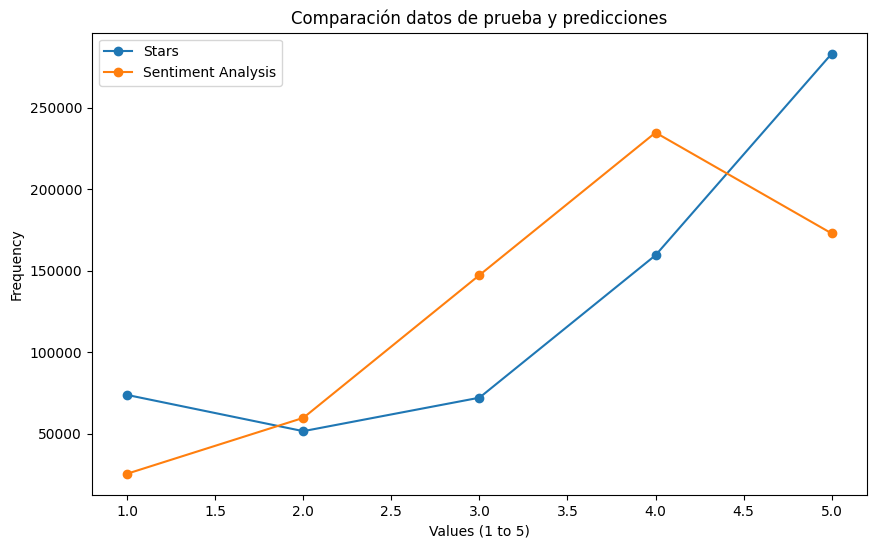

In [66]:
import matplotlib.pyplot as plt

# Assuming reviewyelpnlp is your DataFrame containing 'stars' and 'sentiment_analysis' columns

# Get value counts for both columns
stars_counts = reviewyelpnlp['stars'].value_counts().sort_index()
sentiment_counts = reviewyelpnlp['sentiment_analysis'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot 'stars' column
plt.plot(stars_counts.index, stars_counts.values, label='Stars', marker='o')

# Plot 'sentiment_analysis' column
plt.plot(sentiment_counts.index, sentiment_counts.values, label='Sentiment Analysis', marker='o')

# Set labels and title
plt.xlabel('Values (1 to 5)')
plt.ylabel('Frequency')
plt.title('Comparación datos de prueba y predicciones')
plt.legend()

# Show the plot
plt.show()



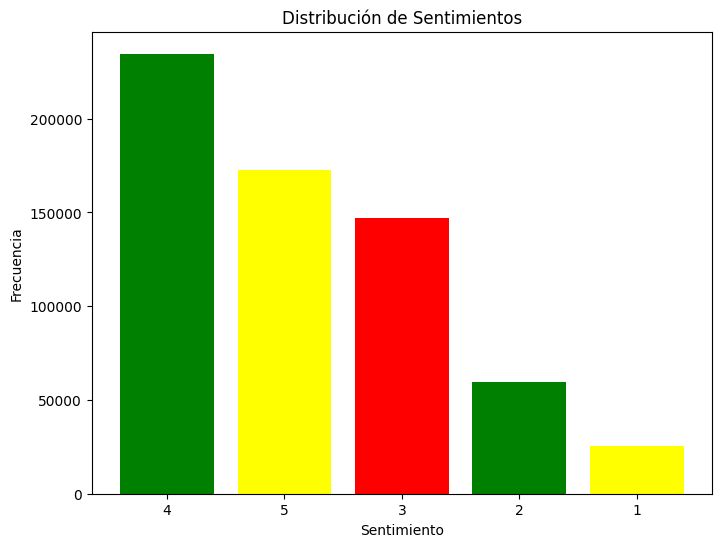

In [69]:
#Se muestra un grafico de barras sobre sentiment_analysis

sentiment_count = reviewyelpnlp['sentiment_analysis'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_count.index, sentiment_count.values, color=['green', 'yellow', 'red'])

plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')

plt.show()